First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

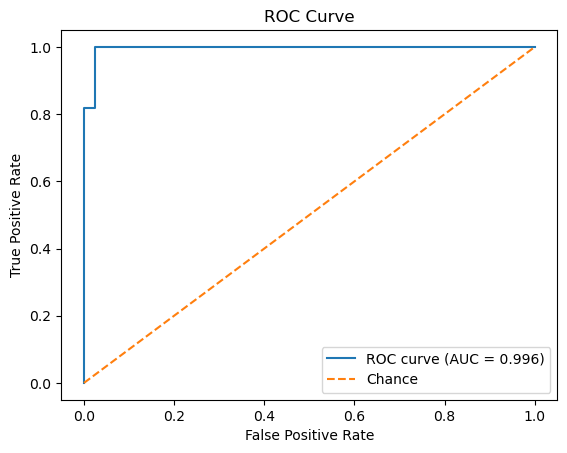


Confusion Matrix (threshold=0.3):
[[40  2]
 [ 0 72]]
Precision (thr=0.3): 0.973
Recall (thr=0.3): 1.000


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Thrishaa J\Downloads\data.csv")

# Inspect the first few rows to identify the target column
print("First few rows of the dataset:")
print(df.head())

# Determine target column
if 'target' in df.columns:
    target_col = 'target'
elif 'diagnosis' in df.columns:
    target_col = 'diagnosis'
else:
    target_col = df.columns[-1]

# Prepare features and target
X = df.drop(columns=[target_col, 'id'], errors='ignore')
y = df[target_col]

# Encode non-numeric target if necessary
if y.dtype == 'object':
    y = y.map({y.unique()[0]: 0, y.unique()[1]: 1})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Fit logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# Evaluate default threshold (0.5)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nConfusion Matrix (threshold=0.5):")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Tune threshold example
new_threshold = 0.3
y_pred_thresh = (y_proba >= new_threshold).astype(int)
cm_new = confusion_matrix(y_test, y_pred_thresh)
precision_new = precision_score(y_test, y_pred_thresh)
recall_new = recall_score(y_test, y_pred_thresh)

print(f"\nConfusion Matrix (threshold={new_threshold}):")
print(cm_new)
print(f"Precision (thr={new_threshold}): {precision_new:.3f}")
print(f"Recall (thr={new_threshold}): {recall_new:.3f}")

